$$\textbf{ANN}$$

In [466]:
from load_data import load_train_test
X_train, X_test, y_train, y_test, input_scaler, target_scaler=load_train_test(filepath='Split/num_bin10_30/bin_10_30.pkl',return_index=4)

Total splits available: 10


/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [473]:
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf

input_dim = X_train.shape[1]
inputs = layers.Input(shape=(input_dim,))
initializer = tf.keras.initializers.HeNormal()
activation_function = tf.keras.activations.relu
l2_reg = regularizers.l2(1e-4)

# Hidden Layer 1
x = layers.Dense(32, activation=activation_function)(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1)(x)

# Hidden Layer 2
x = layers.Dense(256, activation=activation_function, kernel_initializer=initializer, kernel_regularizer=l2_reg)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

# Hidden Layer 3
x = layers.Dense(264, activation=activation_function, kernel_initializer=initializer, kernel_regularizer=l2_reg)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

# Hidden layer 4
x = layers.Dense(32, activation=activation_function)(x)
x = layers.BatchNormalization()(x)

# Output Layer
outputs = layers.Dense(1, activation='sigmoid')(x)  # sigmoid for [0, 1] output

# Define model
best_model_ann = models.Model(inputs=inputs, outputs=outputs)
best_model_ann.summary()

Model: "functional_186"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_186 (InputLayer)    │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_844 (Dense)               │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_461         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_472 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_845 (Dense)               │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_462         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_473 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_846 (Dense)               │ (None, 264)            │        67,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_463         │ (None, 264)            │         1,056 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_474 (Dropout)           │ (None, 264)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_847 (Dense)               │ (None, 32)             │         8,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_464         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_848 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,369 (341.29 KB)

 Trainable params: 86,201 (336.72 KB)

 Non-trainable params: 1,168 (4.56 KB)

In [475]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile the model
best_model_ann.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',  
    metrics=['mae']
)
# Callbacks for better generalization
callbacks = [
    EarlyStopping(patience=20, restore_best_weights=True),
    # ReduceLROnPlateau(patience=10, factor=0.5, verbose=1)
]

# Fit the model
history = best_model_ann.fit(
    X_train, y_train,
    epochs=500,
    batch_size=8,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1510 - mae: 0.1830 - val_loss: 0.1712 - val_mae: 0.2604
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1555 - mae: 0.2023 - val_loss: 0.1730 - val_mae: 0.2603
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1411 - mae: 0.1669 - val_loss: 0.1850 - val_mae: 0.2659
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1410 - mae: 0.1849 - val_loss: 0.1691 - val_mae: 0.2404
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1342 - mae: 0.1540 - val_loss: 0.1696 - val_mae: 0.2393
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1308 - mae: 0.1476 - val_loss: 0.1719 - val_mae: 0.2429
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1395 - mae: 0.1783 - val_loss: 0.1644 - val_mae: 0.2444
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1385 - mae: 0.1713 - val_loss: 0.1578 - val_mae: 0.2323
Epoch 9/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.13

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


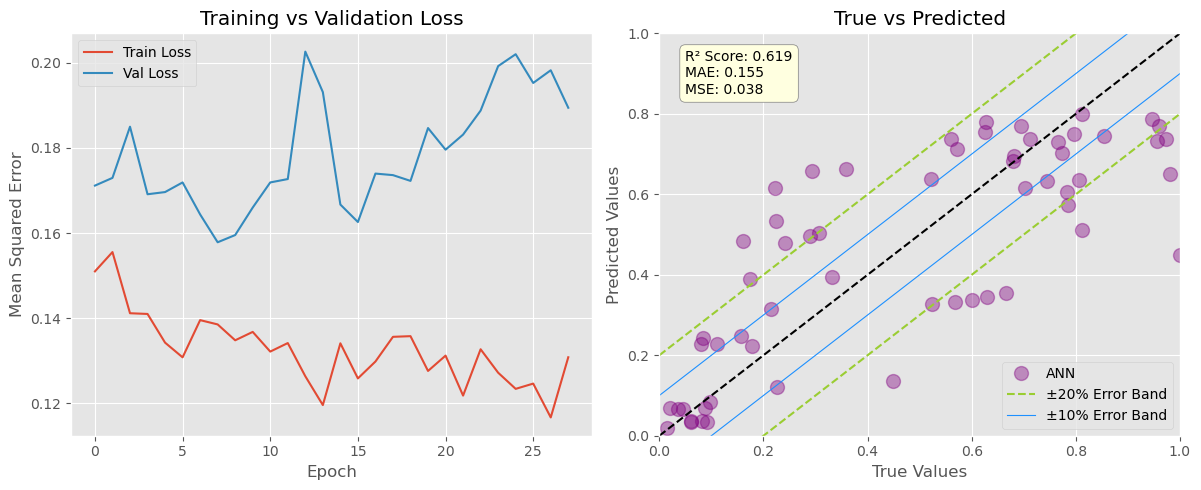

In [476]:
from plot_models import  plot_ann_performance
y_pred_ann=best_model_ann.predict(X_test)
plot_ann_performance(y_test,y_pred_ann,history,model_name='ANN')

In [640]:
best_model_ann.save('best_model_ann.keras')

$$\textbf{PINN}$$

In [477]:
import tqdm as tqdm
from keras.saving import register_keras_serializable
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf

@register_keras_serializable()

class PINN(tf.keras.Model):
    def __init__(self,A,B,C,**kwargs):
        super(PINN,self).__init__(**kwargs)
        self.A = A
        self.B = B
        self.C = C
        self.initializer = tf.keras.initializers.HeNormal()
        self.activation_function = tf.keras.activations.relu
        self.hidden = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu'),
            # tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.1),

            tf.keras.layers.Dense(256, activation=self.activation_function, kernel_initializer=self.initializer),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.4),

            tf.keras.layers.Dense(256, activation=self.activation_function, kernel_initializer=self.initializer),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.4),
            
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(1,activation='sigmoid')  # Output: K (fracture toughness)
            ])
        
        # Trainable physics constants
        self.A = tf.Variable(self.A, dtype=tf.float32, trainable=True)
        self.B = tf.Variable(self.B, dtype=tf.float32, trainable=True)
        self.C = tf.Variable(self.C, dtype=tf.float32, trainable=True)

    def call(self, x):
        return self.hidden(x)


In [426]:
from losses import  physics_loss

In [427]:
import optuna
import numpy as np
from sklearn.metrics import r2_score
import tensorflow as tf

def objective(trial):
    # Suggest hyperparameters
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    weight = trial.suggest_float("weight", 0.01, 10.0)
    delta = trial.suggest_float("delta", 0.01, 0.1)
    A = trial.suggest_float("A", 0, 10)
    B = trial.suggest_float("B", 0, 10)
    C = trial.suggest_float("C", -2.0, 2.0)
    
    # Model and optimizer
    pinn_model = PINN(A, B, C)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    huber_loss = tf.keras.losses.Huber(delta=delta)
    mse_loss = tf.keras.losses.MeanSquaredError()

    # Convert data to tensors once
    inputs = tf.convert_to_tensor(X_train, dtype=tf.float32)
    targets = tf.convert_to_tensor(y_train, dtype=tf.float32)
    
    # Early stopping if NaN is detected
    epochs = 300
    try:
        for epoch in range(epochs):
            with tf.GradientTape() as tape:
                pred_K = pinn_model(inputs)
                data_loss = mse_loss(targets, pred_K)
                physics_loss_ = physics_loss(pinn_model, inputs, delta_=delta)
                total_loss = data_loss + weight * physics_loss_
                
                # Check for NaN in loss
                if tf.math.is_nan(total_loss):
                    return float('inf')  # Penalize trial with NaN loss
                
            all_vars_to_train = pinn_model.trainable_variables + [pinn_model.A, pinn_model.B, pinn_model.C]
            gradients = tape.gradient(total_loss, all_vars_to_train)
            
            # Check for NaN in gradients
            if any(tf.reduce_any(tf.math.is_nan(g)) for g in gradients if g is not None):
                return float('inf')  # Penalize trial with NaN gradients
                
            optimizer.apply_gradients(zip(gradients, all_vars_to_train))

        # Evaluate R² score
        X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
        y_pred = pinn_model(X_test_tensor).numpy()
        
        # Check for NaN in predictions
        if np.isnan(y_pred).any():
            return float('inf')  # Penalize trial with NaN predictions
            
        r2 = r2_score(y_test, y_pred)
        trial.set_user_attr("r2_score", r2)  # Store R² for inspection

        # Combine objective: minimize total loss + (penalty for low R²)
        combined_score = total_loss.numpy() + 1.0 * (1 - r2)
        return combined_score
        
    except Exception as e:
        print(f"Trial failed with error: {e}")
        return float('inf')  # Penalize failed trials

# Run optimization with pruning of bad trials
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20, catch=(ValueError,))

# Best hyperparameters
print("Best Hyperparameters:")
print(study.best_params)

[I 2025-08-26 22:24:27,223] A new study created in memory with name: no-name-5fa51ba8-d0e4-4c03-9e86-51a54e35becf
[I 2025-08-26 22:24:44,080] Trial 0 finished with value: 0.2902257442474365 and parameters: {'lr': 0.0013920659487133356, 'weight': 7.337943816138441, 'delta': 0.05046631122240404, 'A': 1.7137843961095178, 'B': 2.1615222992751737, 'C': -1.1270437968069391}. Best is trial 0 with value: 0.2902257442474365.
[I 2025-08-26 22:25:00,705] Trial 1 finished with value: 0.29127267003059387 and parameters: {'lr': 0.000550995153708059, 'weight': 8.17532341372014, 'delta': 0.03486164199627114, 'A': 5.660108098008202, 'B': 2.8610866299278683, 'C': 0.1042765643810255}. Best is trial 0 with value: 0.2902257442474365.
[I 2025-08-26 22:25:17,253] Trial 2 finished with value: 0.30996546149253845 and parameters: {'lr': 0.0002835405681175921, 'weight': 4.7310115367196826, 'delta': 0.07236973758981571, 'A': 3.0214345038585178, 'B': 7.205559051263578, 'C': 1.2454762548644172}. Best is trial 0 wit

Best Hyperparameters:
{'lr': 0.00991454205118791, 'weight': 2.434796534169891, 'delta': 0.025727799447447578, 'A': 9.761697802313897, 'B': 8.428259195412021, 'C': 0.31502693215549815}


In [428]:
print("Best R² Score:")
print(study.best_trial.user_attrs["r2_score"])

Best R² Score:
0.8452275683007666


In [429]:
best_lr = study.best_params['lr']
best_weight = study.best_params['weight']
best_delta = study.best_params['delta']
best_A = study.best_params['A']
best_B = study.best_params['B']
best_C = study.best_params['C']

In [482]:

# Re-initialize model
best_model = PINN(best_A, best_B, best_C)
optimizer = tf.keras.optimizers.Adam(learning_rate=best_lr)
huber_loss = tf.keras.losses.Huber(delta=best_delta)
mse_loss = tf.keras.losses.MeanSquaredError()
epochs = 300
p_loss=[]
d_loss=[]
t_loss=[]
for epoch in tqdm.tqdm(range(epochs)):
    with tf.GradientTape() as tape:
        inputs = tf.convert_to_tensor(X_train, dtype=tf.float32)
        targets = tf.convert_to_tensor(y_train, dtype=tf.float32)
        pred_K = best_model(inputs)

        data_loss = mse_loss(targets, pred_K)
        physics_loss_ = physics_loss(best_model, inputs,best_delta)
        total_loss = data_loss + best_weight * physics_loss_
        p_loss.append(physics_loss_)
        d_loss.append(data_loss)
        t_loss.append(total_loss)
    all_vars_to_train = best_model.trainable_variables 
    gradients = tape.gradient(total_loss, all_vars_to_train)
    optimizer.apply_gradients(zip(gradients, all_vars_to_train))

    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Total Loss = {total_loss.numpy():.4f}, "
              f"Data = {data_loss.numpy():.4f}, Physics = {physics_loss_.numpy():.4f},\n"
              f"A = {best_model.A.numpy()}, B = {best_model.B.numpy()}, C = {best_model.C.numpy()}")

  0%|          | 0/300 [00:00<?, ?it/s]

  1%|          | 3/300 [00:00<00:23, 12.65it/s]

Epoch 0: Total Loss = 0.1044, Data = 0.1039, Physics = 0.0002,
A = 9.761697769165039, B = 8.428258895874023, C = 0.3150269389152527


 68%|██████▊   | 203/300 [00:11<00:05, 19.04it/s]

Epoch 200: Total Loss = 0.0069, Data = 0.0063, Physics = 0.0003,
A = 9.761697769165039, B = 8.428258895874023, C = 0.3150269389152527


100%|██████████| 300/300 [00:16<00:00, 18.58it/s]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


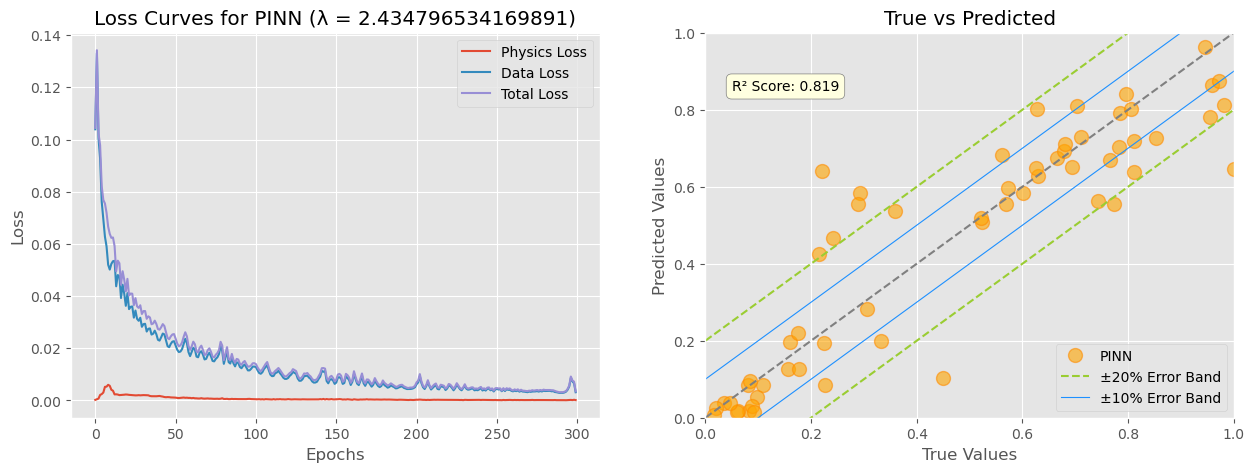

<Figure size 640x480 with 0 Axes>

In [483]:
from plot_models import plot_pinn_performance
y_pred_pinn = best_model.predict(X_test)
plot_pinn_performance(y_test, y_pred_pinn, p_loss, d_loss, t_loss,best_weight)

In [484]:
best_model_pinn=best_model

In [486]:
%save pinn_model.py 477
best_model_pinn.save('pinn_model.keras')

The following commands were written to file `pinn_model.py`:
import tqdm as tqdm
from keras.saving import register_keras_serializable
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf

@register_keras_serializable()

class PINN(tf.keras.Model):
    def __init__(self,A,B,C,**kwargs):
        super(PINN,self).__init__(**kwargs)
        self.A = A
        self.B = B
        self.C = C
        self.initializer = tf.keras.initializers.HeNormal()
        self.activation_function = tf.keras.activations.relu
        self.hidden = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu'),
            # tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.1),

            tf.keras.layers.Dense(256, activation=self.activation_function, kernel_initializer=self.initializer),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.4),

            tf.keras.layers.Dense(256, activation=self.act

$$\textbf{SVR}$$

In [487]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svr_model = SVR()
svr_grid_search = GridSearchCV(svr_model, svr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
svr_grid_search.fit(X_train, y_train)

svr_best_params = svr_grid_search.best_params_
svr_best_model = svr_grid_search.best_estimator_
print("Best SVR Hyperparameters:", svr_best_params)

/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was 

Best SVR Hyperparameters: {'C': 10, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}


/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


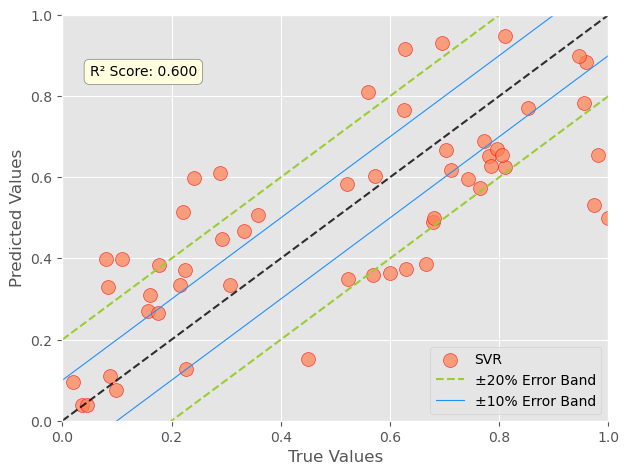

In [488]:
from plot_models import  plot_pred_vs_true

y_pred_svr=svr_best_model.predict(X_test)
plot_pred_vs_true(y_test, y_pred_svr, label='SVR', color='coral', edgecolor='red')

In [646]:
import joblib
joblib.dump(svr_best_model, 'svr_model.pkl')

['svr_model.pkl']

$$\textbf{Random Forest}$$

In [489]:
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and model
rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_

# Display the best parameters
print("Best Parameters for Random Forest:", rf_best_params)

/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed

/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


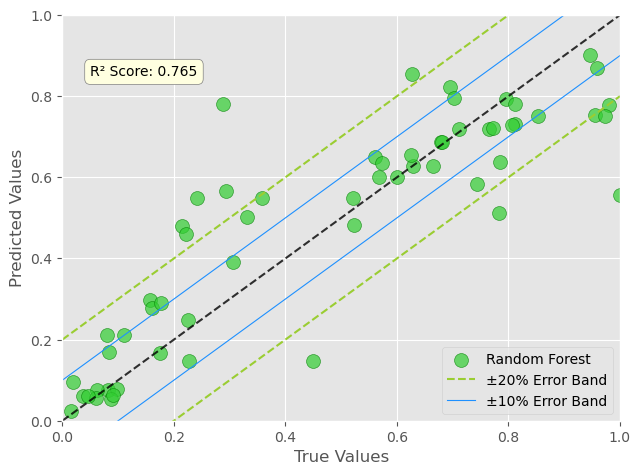

In [490]:
import matplotlib.pyplot as plt
from plot_models import  plot_pred_vs_true
y_pred_rf=rf_best_model.predict(X_test)
plot_pred_vs_true(y_test, y_pred_rf, label='Random Forest', color='limegreen', edgecolor='green')

In [647]:
joblib.dump(rf_best_model, 'rf_model.pkl')

['rf_model.pkl']

$$\textbf{GBDT}$$

In [491]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GBDT
gbdt_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_iter': [100, 200, 300]
}

gbdt_model = HistGradientBoostingRegressor(random_state=42)

# Perform grid search with cross-validation
gbdt_grid_search = GridSearchCV(gbdt_model, gbdt_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gbdt_grid_search.fit(X_train, y_train)

# Get the best parameters and model
gbdt_best_params = gbdt_grid_search.best_params_
gbdt_best_model = gbdt_grid_search.best_estimator_

# Display the best parameters
print("Best Parameters for GBDT:", gbdt_best_params)

/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rohan/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was 

Best Parameters for GBDT: {'learning_rate': 0.2, 'max_depth': 5, 'max_iter': 300, 'min_samples_leaf': 4}


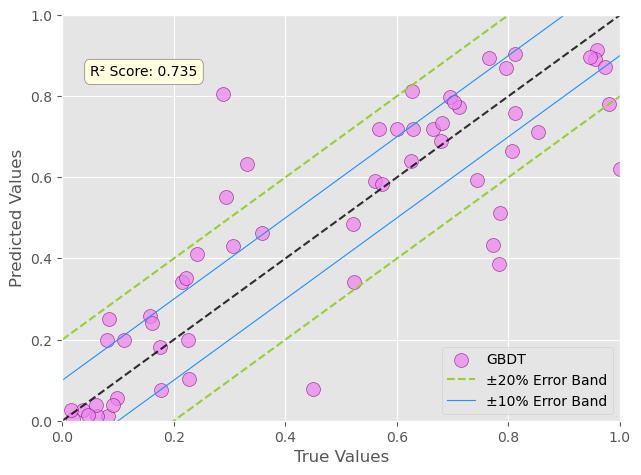

In [492]:
y_pred_gbdt = gbdt_best_model.predict(X_test)
plot_pred_vs_true(y_test, y_pred_gbdt, label='GBDT', color='violet', edgecolor='purple')

$$\textbf{XGBoost}$$

In [493]:
from xgboost import XGBRegressor

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBRegressor(objective='reg:squarederror', tree_method='hist', random_state=42)

# Perform grid search with cross-validation
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and model
xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_

# Display the best parameters
print("Best Parameters for XGBoost:", xgb_best_params)

Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}


In [649]:
joblib.dump(gbdt_best_model, 'gbdt_model.pkl')

['gbdt_model.pkl']

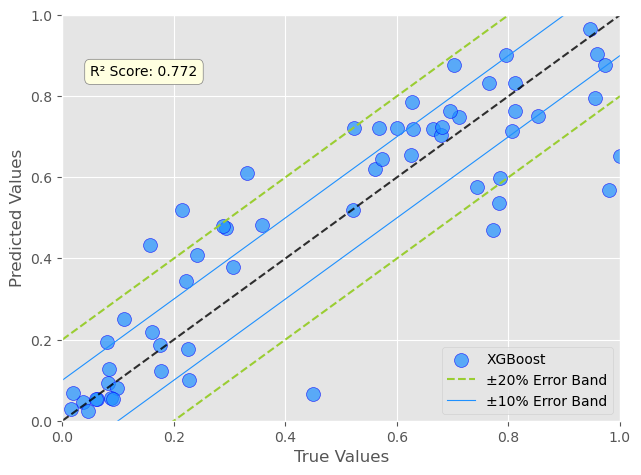

In [494]:
y_pred_xgb = xgb_best_model.predict(X_test)
plot_pred_vs_true(y_test, y_pred_xgb, label='XGBoost', color='dodgerblue', edgecolor='blue')

In [650]:
xgb_best_model.save_model('xgb_model.json')